In [1]:
from pyps import Basis, Hamiltonian, eigenenergies
from pyps.constants import e, a0, En_h, mu_B

import matplotlib.pyplot as plt

In [2]:
H = Hamiltonian(Basis.create(n_values=[2]), upper=False, sparse_format="csc")

## Field-free Hamiltonian

In [3]:
H.e0()

<16x16 sparse matrix of type '<class 'numpy.float64'>'
	with 16 stored elements in Compressed Sparse Column format>

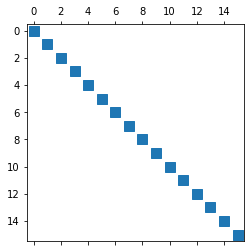

In [4]:
plt.spy(H.e0());

In [5]:
# diagonal elements
H.e0().diagonal()

array([-0.0625027 , -0.06250165, -0.06250082, -0.06250082, -0.06250082,
       -0.06250054, -0.06250054, -0.06250054, -0.06250015, -0.06250015,
       -0.06250015, -0.06250015, -0.06250015, -0.06249884, -0.06249884,
       -0.06249884])

In [6]:
# i.e.
H.eigenenergies(units="atomic_units")

array([-0.0625027 , -0.06250165, -0.06250082, -0.06250082, -0.06250082,
       -0.06250054, -0.06250054, -0.06250054, -0.06250015, -0.06250015,
       -0.06250015, -0.06250015, -0.06250015, -0.06249884, -0.06249884,
       -0.06249884])

In [7]:
# alt.
eigenenergies(H.e0())

array([-0.0625027 , -0.06250165, -0.06250082, -0.06250082, -0.06250082,
       -0.06250054, -0.06250054, -0.06250054, -0.06250015, -0.06250015,
       -0.06250015, -0.06250015, -0.06250015, -0.06249884, -0.06249884,
       -0.06249884])

## Stark matrix

In [8]:
H.stark(Fz=1.0)

Stark: 100%|████████████████████████████████████| 16/16 [00:00<00:00, 25.52it/s]


<16x16 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Column format>

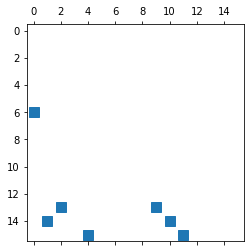

In [9]:
plt.spy(H._stark_z_matrix)

`scipy.linalg.eigvalsh` only uses the lower elements to compute the eigenvalues of a Hermitian matrix.   However, the full matrix is required by the sparse solver, `scipy.sparse.linalg.eigsh`. To calculate the upper elements too, set the `Hamiltonian.upper` attribute to `True`.

In [10]:
H.reset()
H.upper = True

H.stark(Fz=1.0)

Stark: 100%|██████████████████████████████████| 16/16 [00:00<00:00, 1635.25it/s]


<16x16 sparse matrix of type '<class 'numpy.float64'>'
	with 14 stored elements in Compressed Sparse Column format>

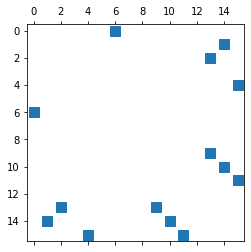

In [11]:
plt.spy(H._stark_z_matrix)

## Zeeman matrix

In [12]:
H.zeeman(Bz=1.0)

Zeeman: 100%|██████████████████████████████████| 16/16 [00:00<00:00, 591.94it/s]


<16x16 sparse matrix of type '<class 'numpy.float64'>'
	with 14 stored elements in Compressed Sparse Column format>

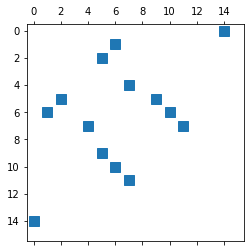

In [13]:
plt.spy(H._zeeman_matrix)

## Total Hamiltonian 

The underlying Stark and Zeeman terms have been cached for rapid recalculation.

In [14]:
H.total(Fz=1.0, Bz=1.0)

<16x16 sparse matrix of type '<class 'numpy.float64'>'
	with 44 stored elements in Compressed Sparse Column format>

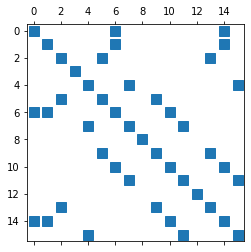

In [15]:
plt.spy(H.total(Fz=1.0, Bz=1.0));

However, the cache can be cleared using the `reset` method.

In [16]:
H.reset()

... the terms are subsequently recalculated when needed.

In [17]:
H.numerov = True
H.total(Fz=1.0, Bz=1.0)

Zeeman: 100%|█████████████████████████████████| 16/16 [00:00<00:00, 1752.42it/s]


<16x16 sparse matrix of type '<class 'numpy.float64'>'
	with 44 stored elements in Compressed Sparse Column format>

Total Hamiltonian matrix converted to an array.

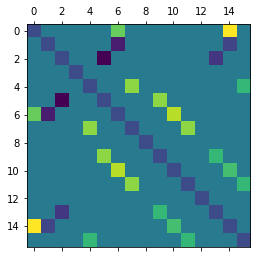

In [18]:
plt.matshow(H.total(Fz=0.02, Bz=0.1).toarray())

Eigenvalues are computed from dense matrices (requires more memory but faster than sparse calc.)

In [19]:
# eigenvalues
electric_field = 582  # V/m
magnetic_field = 0.2  # T
H.eigenenergies(electric_field, magnetic_field, units="eV")

array([-1.70079004, -1.70076271, -1.7007503 , -1.7007503 , -1.70073564,
       -1.70073383, -1.70072496, -1.70072496, -1.70071569, -1.70071569,
       -1.70070054, -1.70070054, -1.70070014, -1.70068001, -1.70068001,
       -1.70067514])

In [20]:
# alt.
Fz = electric_field * e * a0 / En_h
Bz = magnetic_field * mu_B / En_h
eigenenergies(H.e0() + H.stark(Fz) + H.zeeman(Bz), units="eV")

array([-1.70079004, -1.70076271, -1.7007503 , -1.7007503 , -1.70073564,
       -1.70073383, -1.70072496, -1.70072496, -1.70071569, -1.70071569,
       -1.70070054, -1.70070054, -1.70070014, -1.70068001, -1.70068001,
       -1.70067514])

In [21]:
M = H.total(Bz=1.0)
M

<16x16 sparse matrix of type '<class 'numpy.float64'>'
	with 30 stored elements in Compressed Sparse Column format>

In [22]:
type(M)

scipy.sparse.csc.csc_matrix

## dense matrices


In [23]:
H.reset()
H.sparse_format = "array"
M = H.total(Fz=1.0, Bz=1.0)
type(M)

Zeeman: 100%|█████████████████████████████████| 16/16 [00:00<00:00, 1073.02it/s]


numpy.ndarray

In [24]:
M.shape

(16, 16)